## The Uniform Distribution

Load libraries. We use the scipy.stats library.

Use scipy library to create a randam uniform distribution data (100000 numbers from 0 to 10)

In [24]:
import numpy as np
from scipy import stats

# Define the parameters for the uniform distribution
start = 0
width = 10

# Generate random numbers
random_data = stats.uniform.rvs(size=100000, loc=start, scale=width)

# The result is an array of 100,000 numbers from a uniform distribution between 0 and 10.
print(random_data)

[0.3815911  1.60251455 8.12986552 ... 3.76730342 3.62717357 9.29059899]


Plot the following density distribution.
You can use figsize=(9,9), xlim=(-1,11)

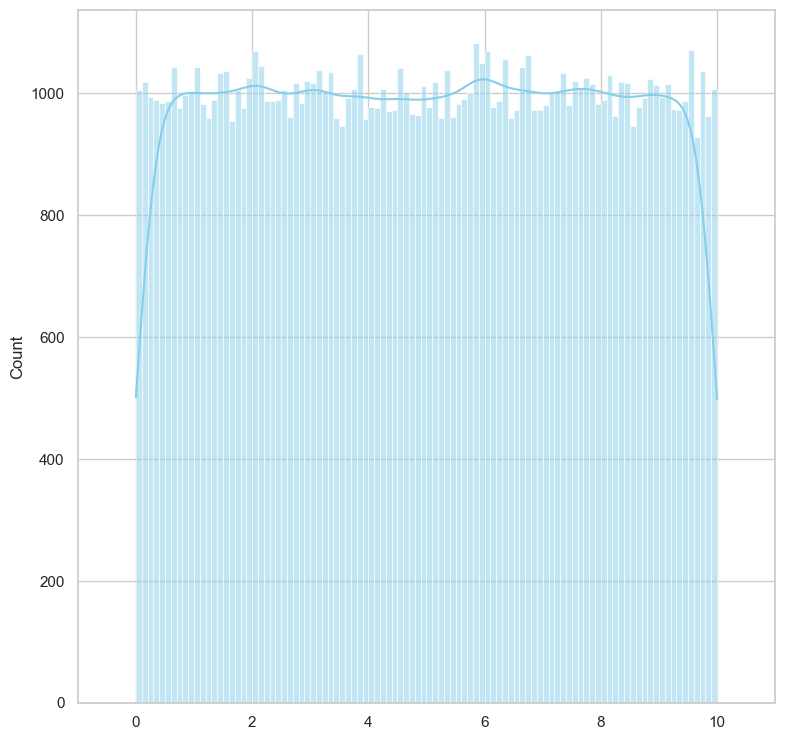

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plot
sns.set(style='whitegrid')

# Set the size of the plot
plt.figure(figsize=(9, 9))

# Generate a histogram and kernel density estimate
sns.histplot(random_data, bins=100, kde=True, color='skyblue')

# Set the limits of the x-axis
plt.xlim(-1, 11)

# Show the plot
plt.show()


Check scipy libraries and use useful functions. 

cdf (cumulative distribution function) gives you the area under the distribution's density curve to the left of a certain value on the x axis. Calculate cdf with x axis from 0 to 2.5. 

In [5]:
from scipy.stats import uniform

# parameters for the uniform distribution
start = 0
width = 10

rv = uniform(start, width)

# value to calculate CDF at
x = 2.5

# calculate CDF
cdf_value = rv.cdf(x)

print(f"The CDF value at {x} is {cdf_value}")

The CDF value at 2.5 is 0.25


ppf() is the inverse of cdf(): it returns the x axis cutoff value (quantile) associated with a given probability. Caculate the cutoff value for propabality with 40%.

In [6]:
from scipy.stats import uniform

# parameters for the uniform distribution
start = 0
width = 10

rv = uniform(start, width)

# probability to calculate PPF at
p = 0.4

# calculate PPF
ppf_value = rv.ppf(p)

print(f"The cutoff value for a probability of {p} is {ppf_value}")

The cutoff value for a probability of 0.4 is 4.0


Demonstrate for uniform distribution, x values within the range will have the same probability desity.  x values outside the range have a probability density of 0. The output is similar as the following.

In [7]:
from scipy.stats import uniform

# parameters for the uniform distribution
start = 0
width = 10

rv = uniform(start, width)

# x values to calculate PDF at
x_values = [-1, 2, 5, 8, 11]

# calculate and print PDF for each x value
for x in x_values:
    pdf_value = rv.pdf(x)
    print(f"Density at x value {x} is {pdf_value}")

Density at x value -1 is 0.0
Density at x value 2 is 0.1
Density at x value 5 is 0.1
Density at x value 8 is 0.1
Density at x value 11 is 0.0


Probability distribution functions in scipy also support median(), mean(), var() and std().

## The Normal Distribution


Use scipy's norm to have normal distribution (see the graph below) .  The normal distribution has default vaues of  mean of 0 and standard deviation of 1. Investigate what percentage of data generated by a default normal distribution is below -1. What percentage of data generated is above 1 and what percentage lies between -1 and 1. Print the three percentages. The output is similar as the following. 

In [10]:
from scipy.stats import norm

# create a standard normal distribution (mean 0, standard deviation 1)
rv = norm(0, 1)

# calculate the percentages
percentage_below_minus1 = rv.cdf(-1)
percentage_above_1 = 1 - rv.cdf(1)
percentage_between_minus1_and_1 = rv.cdf(1) - rv.cdf(-1)

# print the percentages
print(f"Percentage of data below -1: {percentage_below_minus1}")
print(f"Percentage of data above 1: {percentage_above_1}")
print(f"Percentage of data between -1 and 1: {percentage_between_minus1_and_1}")

Percentage of data below -1: 0.15865525393145707
Percentage of data above 1: 0.15865525393145707
Percentage of data between -1 and 1: 0.6826894921370859


Plotting is not required. The codes will be included in the solution. The image below shows the bell shape normal distribution.  

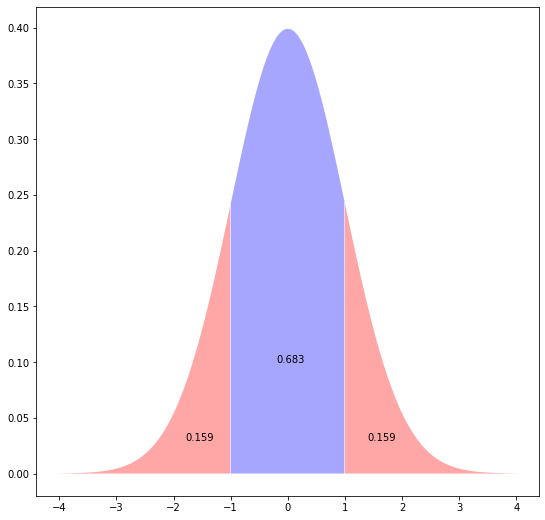


print the ppf for 2.5% cutoff and 97.5% cutoff. The output is similar as the following

In [12]:
from scipy.stats import norm

# create a standard normal distribution (mean 0, standard deviation 1)
rv = norm(0, 1)

# calculate the ppf for the 2.5% cutoff and the 97.5% cutoff
ppf_25 = rv.ppf(0.025)
ppf_975 = rv.ppf(0.975)

# print the ppf
print(f"2.5% cutoff: {ppf_25}")
print(f"97.5% cutoff: {ppf_975}")

2.5% cutoff: -1.9599639845400545
97.5% cutoff: 1.959963984540054


The quantile output above confirms that roughly 5% of the data lies more than 2 standard deviations from the mean.


## The Binomial Distribution

We will use binomial distribution to model coin flips. The scipy name for the binomial is binom. Here we set the number of flips per trial to 10,  the number of trials to 10000, and success probability to 0.5. 

Create a random binomial distribution data "fair_coin_flips" in the code line below.

In [15]:
from scipy.stats import binom

# Set the parameters
n = 10  # number of flips per trial
p = 0.5  # success probability
size = 10000  # number of trials

# Generate the random binomial distribution
fair_coin_flips = binom.rvs(n=n, p=p, size=size)

In [14]:
# Codes are provided here. 
# Print out the counts for 0 heads, 1 head, ...10 heads of each trial with 10000 trials. 
print( pd.crosstab(index="counts", columns= fair_coin_flips))
# Draw the histogram.
pd.DataFrame(fair_coin_flips).hist(range=(-0.5,10.5), bins=11);

NameError: name 'pd' is not defined

The histogram above shows us that a binomial distribution with a 50% probability of success is roughly symmetric, with the most likely outcomes lying at the center. 
Change the success rate to 0.8, implement the codes similar as above to show the distribution won't be symmetric:

col_0   3   4    5    6     7     8     9     10
row_0                                           
counts  10  57  247  910  2070  3001  2651  1054


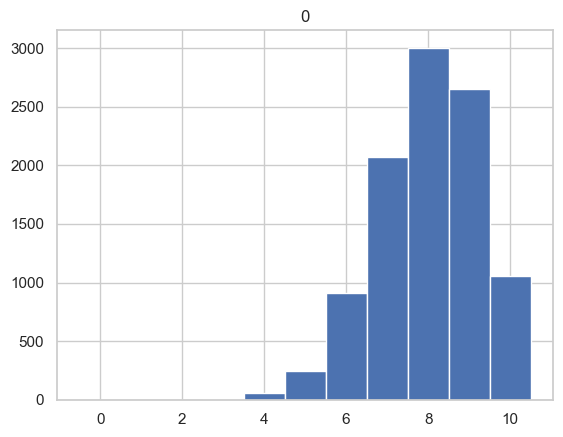

In [16]:
from scipy.stats import binom
import pandas as pd

# Set the parameters
n = 10  # number of flips per trial
p = 0.8  # success probability
size = 10000  # number of trials

# Generate the random binomial distribution
biased_coin_flips = binom.rvs(n=n, p=p, size=size)

# Print out the counts
print(pd.crosstab(index="counts", columns=biased_coin_flips))

# Draw the histogram
pd.DataFrame(biased_coin_flips).hist(range=(-0.5,n+0.5), bins=n+1);

Continue from above binomial distribution(success rate=0.8), give the codes to get the probability of achieving 5 heads or less with 10 flips.

In [18]:
from scipy.stats import binom

# Set the parameters
n = 10  # number of flips per trial
p = 0.8  # success probability
k = 5  # number of successes

# Calculate the cumulative probability
probability = binom.cdf(k=k, n=n, p=p)

# Print the result
print(f"The probability of getting {k} heads or fewer in {n} flips is {probability}")

The probability of getting 5 heads or fewer in 10 flips is 0.03279349759999997


Continue from above binomial distribution(success rate=0.8), give the codes to get the probability of achieving 9 heads or more with 10 flips.

In [19]:
from scipy.stats import binom

# Set the parameters
n = 10  # number of flips per trial
p = 0.8  # success probability
k = 8  # number of successes

# Calculate the cumulative probability
probability = 1 - binom.cdf(k=k, n=n, p=p)

# Print the result
print(f"The probability of getting more than {k} heads in {n} flips is {probability}")

The probability of getting more than 8 heads in 10 flips is 0.37580963840000015


For continuous probability density functions, you use pdf() to check the probability density at a given x value. For discrete distributions like the binomial, use stats.distribution.pmf() (probability mass function) to check the mass (proportion of observations) at given number of successes k. 
Write codes to give the probability density at 5 heads with success rate of 0.5 of 10 flips.

In [20]:
from scipy.stats import binom

# Set the parameters
n = 10  # number of flips per trial
p = 0.5  # success probability
k = 5  # number of successes

# Calculate the probability mass
probability_mass = binom.pmf(k=k, n=n, p=p)

# Print the result
print(f"The probability mass at {k} heads in {n} flips is {probability_mass}")

The probability mass at 5 heads in 10 flips is 0.2460937500000002


What about the probability density at 8 heads with success rate of 0.8 of 10 flips?

In [21]:
from scipy.stats import binom

# Set the parameters
n = 10  # number of flips per trial
p = 0.8  # success probability
k = 8  # number of successes

# Calculate the probability mass
probability_mass = binom.pmf(k=k, n=n, p=p)

# Print the result
print(f"The probability mass at {k} heads in {n} flips is {probability_mass}")

The probability mass at 8 heads in 10 flips is 0.3019898880000002


## Wrap Up

Extra information of Exponential Distributions and Poisson Distributions will be given in the solution. 


Python's scipy library contains functions that make it easy to work with a wide range of probability distributions, including [many that we did not discuss](https://docs.scipy.org/doc/scipy/reference/stats.html) in this lesson. Probability distribution functions are useful for generating random data, modeling random events and aiding with statistical tests and analysis.
